c:\Users\ferna\anaconda3\envs\hydromt-sfincs\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\ferna\anaconda3\envs\hydromt-sfincs\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\ferna\anaconda3\envs\hydromt-sfincs\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\ferna\anaconda3\envs\hydromt-sfincs\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarn

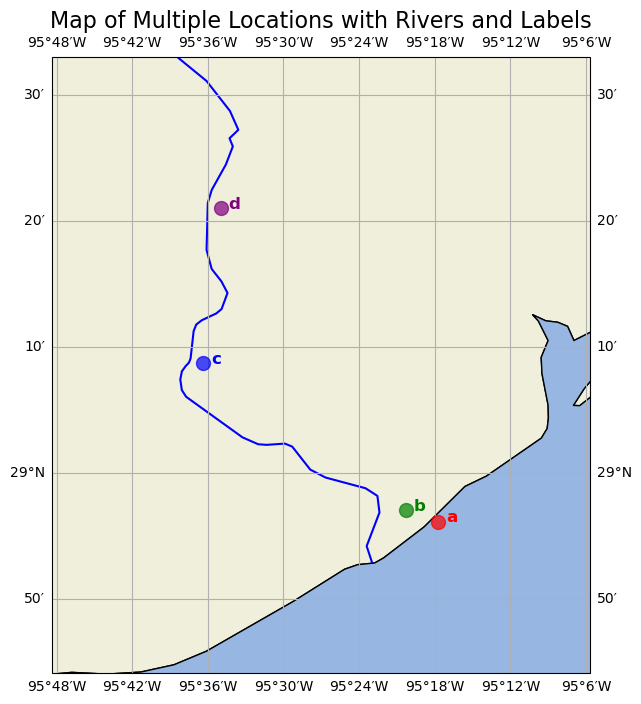

In [ ]:
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# from shapely.geometry import Point

# # Coordinates in decimal degrees
# coordinates = [
#     (28 + (56.1 / 60), -(95 + (17.7 / 60))),  # Point A (converted from DMS to decimal)
#     (28.95, -95.338),                         # Point B
#     (29.1444131, -95.6060571),                # Point C
#     (29.3496858, -95.5824448)                 # Point D
# ]

# # Labels for each point
# labels = ['a', 'b', 'c', 'd']

# # Colors for each point
# colors = ['red', 'green', 'blue', 'purple']

# # Step 1: Create a GeoDataFrame with the points of interest
# geometry = [Point(lon, lat) for lat, lon in coordinates]
# gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")

# # Step 2: Set up the map with Cartopy
# fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# # Add features to the map (land, ocean, coastlines, borders, rivers)
# ax.add_feature(cfeature.LAND, edgecolor='black')
# ax.add_feature(cfeature.OCEAN)
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
# ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=1.5)  # Add rivers
# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# # Step 3: Limit the x and y axis to zoom into the area of interest
# ax.set_xlim(min([lon for lat, lon in coordinates]) - 0.2, max([lon for lat, lon in coordinates]) + 0.2)  # Adjust longitude range
# ax.set_ylim(min([lat for lat, lon in coordinates]) - 0.2, max([lat for lat, lon in coordinates]) + 0.2)     # Adjust latitude range

# # Step 4: Plot each point with a different color and label
# for i, point in enumerate(gdf.geometry):
#     ax.plot(point.x, point.y, marker='o', color=colors[i], markersize=10, alpha=0.7)  # Plot each point
#     ax.text(point.x + 0.01, point.y, labels[i], fontsize=12, color=colors[i], weight='bold')  # Add label

# # Step 5: Enhance the map
# ax.set_title("Map of Multiple Locations with Rivers and Labels", fontsize=16)

# # Step 6: Show the map
# plt.show()


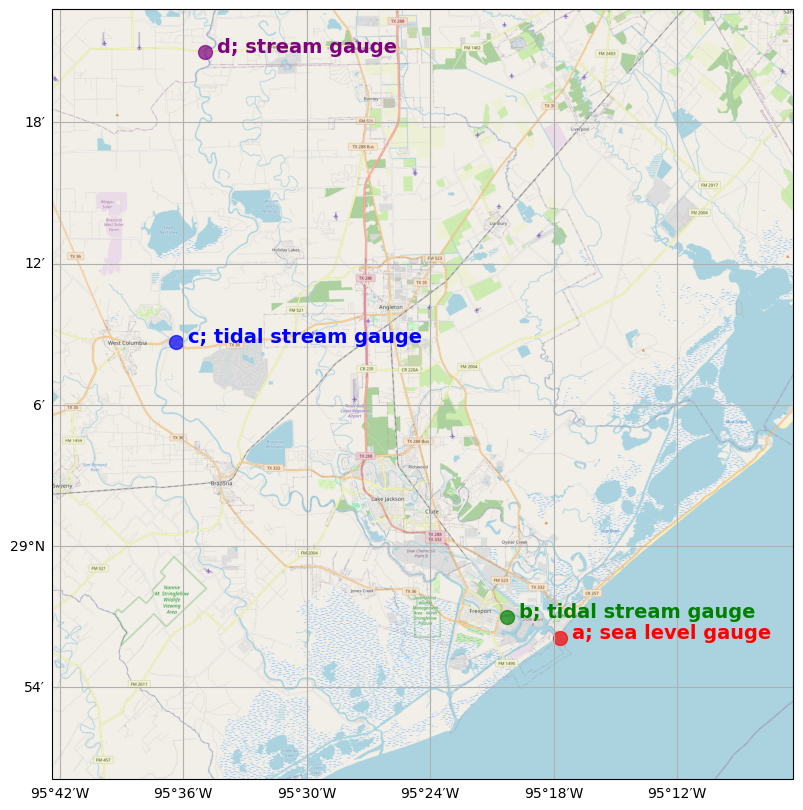

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.img_tiles import OSM
from shapely.geometry import Point

# Coordinates in decimal degrees
coordinates = [
    (28 + (56.1 / 60), -(95 + (17.7 / 60))),  # Point A (converted from DMS to decimal)
    (28.95, -95.338),                         # Point B
    (29.1444131, -95.6060571),                # Point C
    (29.3496858, -95.5824448)                 # Point D
]

# Labels for each point
labels = ['a; sea level gauge', 'b; tidal stream gauge', 'c; tidal stream gauge', 'd; stream gauge']

# Colors for each point
colors = ['red', 'green', 'blue', 'purple']

# Step 1: Create a GeoDataFrame with the points of interest
geometry = [Point(lon, lat) for lat, lon in coordinates]
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")

# Step 2: Set up the map with Cartopy and OSM basemap
tiles = OSM()  # Use OSM tiles as the basemap
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': tiles.crs})  # Square-shaped figure
ax.add_image(tiles, 12)  # Adjust the zoom level (10 is a good starting point)

# Step 3: Determine the extent to make the map square in terms of latitude and longitude
min_lon = min([lon for lat, lon in coordinates])
max_lon = max([lon for lat, lon in coordinates])
min_lat = min([lat for lat, lon in coordinates])
max_lat = max([lat for lat, lon in coordinates])

lat_range = max_lat - min_lat
lon_range = max_lon - min_lon

# Make the extent square by setting both ranges equal to the larger of the two
max_range = max(lat_range, lon_range)
ax.set_extent([
    min_lon - 0.1, min_lon + 0.5,
    min_lat - 0.1, max_lat + 0.03
], crs=ccrs.PlateCarree())

# Step 4: Plot each point with a different color and label
for i, point in enumerate(gdf.geometry):
    ax.plot(
        point.x, point.y,
        marker='o',
        color=colors[i],
        markersize=10,
        alpha=0.7,
        transform=ccrs.PlateCarree()  # Ensure points are in the correct projection
    )  # Plot each point
    ax.text(
        point.x + 0.01, point.y,
        labels[i],
        fontsize=14,
        color=colors[i],
        weight='bold',
        transform=ccrs.PlateCarree()  # Ensure text is in the correct projection
    )  # Add label

# Step 5: Add gridlines
gridlines = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gridlines.top_labels = False
gridlines.right_labels = False

# Step 6: Enhance the map
# ax.set_title("Map of Multiple Locations with OSM Basemap", fontsize=16)
ax.set_xlabel("Longtitude")
ax.set_ylabel("Latitude")

# Step 7: Show the map
plt.show()